In [135]:
import numpy as np
import pandas as pd

In [136]:
df=pd.read_csv('modified_placement_data.csv')

In [137]:
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     object 
 1   iq         100 non-null    float64
 2   placement  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [139]:
df.shape

(100, 3)

In [140]:
df['cgpa'] = df['cgpa'].astype(str).str.replace(',', '.').astype(float)


In [141]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,Yes
1,5.9,106.0,No
2,5.3,121.0,No
3,7.4,132.0,Yes
4,5.8,142.0,No


In [142]:
import matplotlib.pyplot as plt

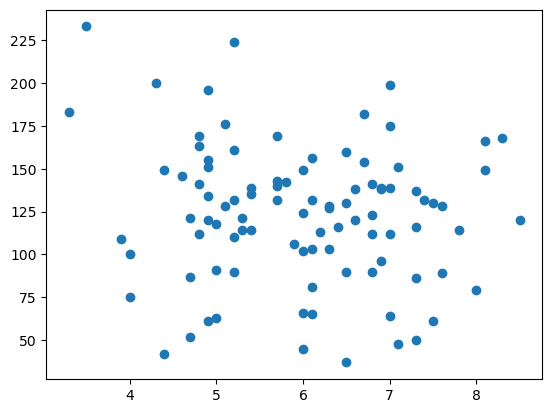

In [143]:
#input columns only
plt.scatter(df['cgpa'],df['iq'])

In [144]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [145]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [146]:
Y

0     Yes
1      No
2      No
3     Yes
4      No
     ... 
95     No
96     No
97    Yes
98    Yes
99    Yes
Name: placement, Length: 100, dtype: object

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [148]:
X_train

,cgpa,iq
0,6.8,123.0
92,5.2,110.0
30,7.6,128.0
89,4.9,151.0
16,5.2,224.0
...,...,...
4,5.8,142.0
90,7.3,86.0
83,7.5,130.0
99,6.2,113.0


In [149]:
X_test

,cgpa,iq
69,8.5,120.0
36,5.7,140.0
23,4.7,87.0
37,8.1,149.0
91,NaN,158.0
48,6.6,138.0
74,6.7,154.0
32,7.0,139.0
56,6.1,65.0
40,4.9,134.0


In [150]:
from sklearn.compose import ColumnTransformer

In [151]:
ct=ColumnTransformer([
    ('simpleimputer',SimpleImputer(),['cgpa'])],remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [152]:
X_train

array([[  6.8      , 123.       ],
       [  5.2      , 110.       ],
       [  7.6      , 128.       ],
       [  4.9      , 151.       ],
       [  5.2      , 224.       ],
       [  7.5      ,  61.       ],
       [  5.9372093, 107.       ],
       [  6.1      , 132.       ],
       [  6.1      , 156.       ],
       [  5.2      , 161.       ],
       [  7.8      , 114.       ],
       [  6.6      , 120.       ],
       [  4.8      , 112.       ],
       [  5.7      , 132.       ],
       [  6.3      , 127.       ],
       [  4.8      , 163.       ],
       [  8.       ,  79.       ],
       [  6.       ,  45.       ],
       [  4.9      , 120.       ],
       [  3.3      , 183.       ],
       [  5.9372093, 141.       ],
       [  5.7      , 169.       ],
       [  8.3      , 168.       ],
       [  4.7      ,  52.       ],
       [  6.8      , 112.       ],
       [  7.1      ,  48.       ],
       [  4.4      ,  42.       ],
       [  5.1      , 176.       ],
       [  6.9      ,

In [153]:
X_test

array([[  8.5      , 120.       ],
       [  5.7      , 140.       ],
       [  4.7      ,  87.       ],
       [  8.1      , 149.       ],
       [  5.9372093, 158.       ],
       [  6.6      , 138.       ],
       [  6.7      , 154.       ],
       [  7.       , 139.       ],
       [  6.1      ,  65.       ],
       [  4.9      , 134.       ]])

In [154]:
X_train = pd.DataFrame(X_train, columns=['cgpa', 'iq'])
X_test = pd.DataFrame(X_test, columns=['cgpa', 'iq'])

In [155]:
X_train

,cgpa,iq
0,6.8,123.0
1,5.2,110.0
2,7.6,128.0
3,4.9,151.0
4,5.2,224.0
...,...,...
85,5.8,142.0
86,7.3,86.0
87,7.5,130.0
88,6.2,113.0


In [156]:
X_test

,cgpa,iq
0,8.500000,120.0
1,5.700000,140.0
2,4.700000,87.0
3,8.100000,149.0
4,5.937209,158.0
5,6.600000,138.0
6,6.700000,154.0
7,7.000000,139.0
8,6.100000,65.0
9,4.900000,134.0


In [157]:
#Label Encoding for placement to convert it into 0 or 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(Y_train)

LabelEncoder()

In [158]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [159]:
Y_train=le.transform(Y_train)
Y_test=le.transform(Y_test)

In [160]:
Y_train

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0])

In [161]:
Y_test

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [162]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [163]:
#EVALUATE MODEL/MODEL SELECTION
Y_pred = lr.predict(X_test)

In [164]:
Y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [165]:
Y_test

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [166]:
from sklearn.metrics import accuracy_score

In [167]:
accuracy_score(Y_test, Y_pred)

0.8

In [171]:
import pickle
#convert it into file
pickle.dump(lr,open('modelpr3.pkl','wb'))